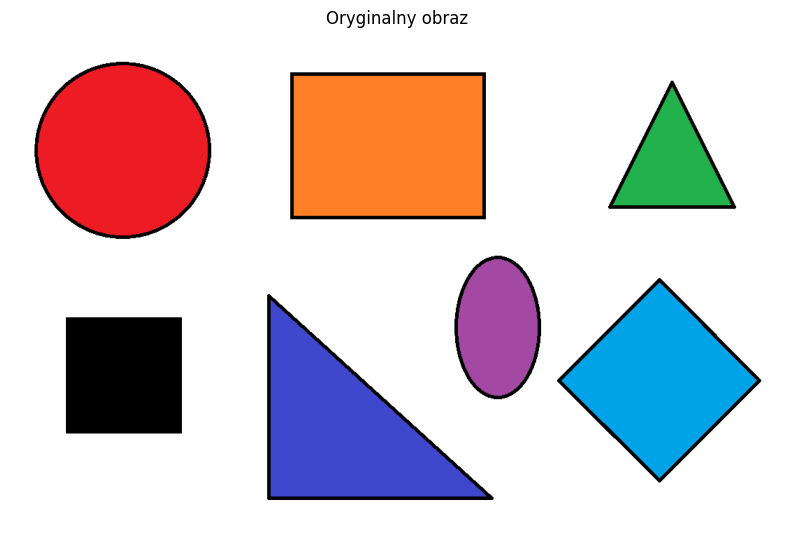

In [7]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Wczytanie obrazu
image = cv2.imread('test.png')

# Display the original image
plt.figure(figsize=(10, 10))
plt.title('Oryginalny obraz')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


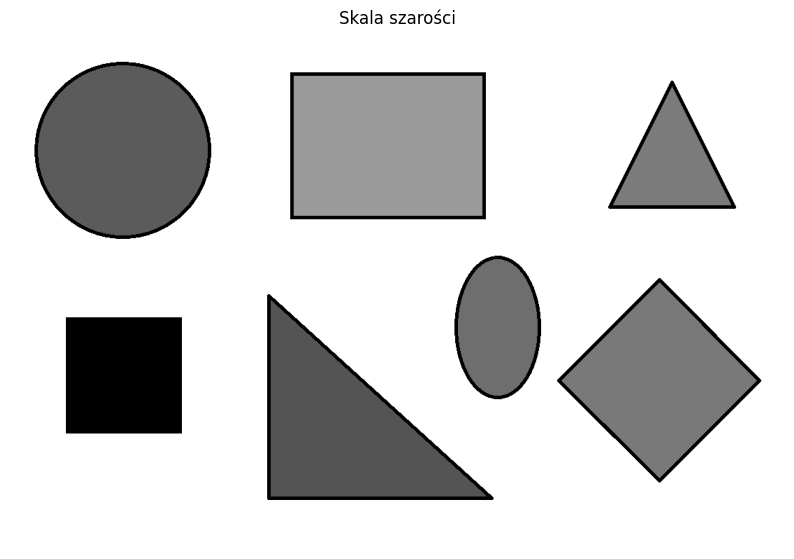

In [8]:

# 2. Konwersja do skali szarości
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 10))
plt.title('Skala szarości')
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()


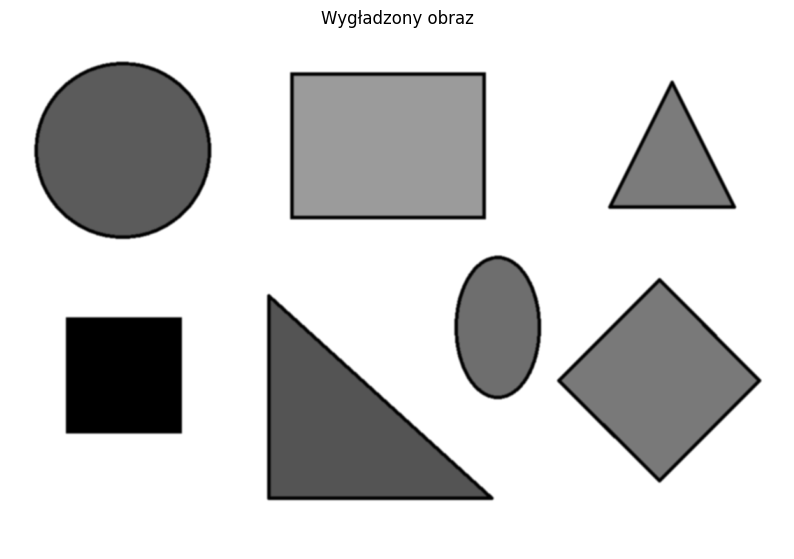

In [9]:

# 2.1 Filtracja wstępna
filtered = cv2.GaussianBlur(gray, (5, 5), 0)
plt.figure(figsize=(10, 10))
plt.title('Wygładzony obraz')
plt.imshow(filtered, cmap='gray')
plt.axis('off')
plt.show()


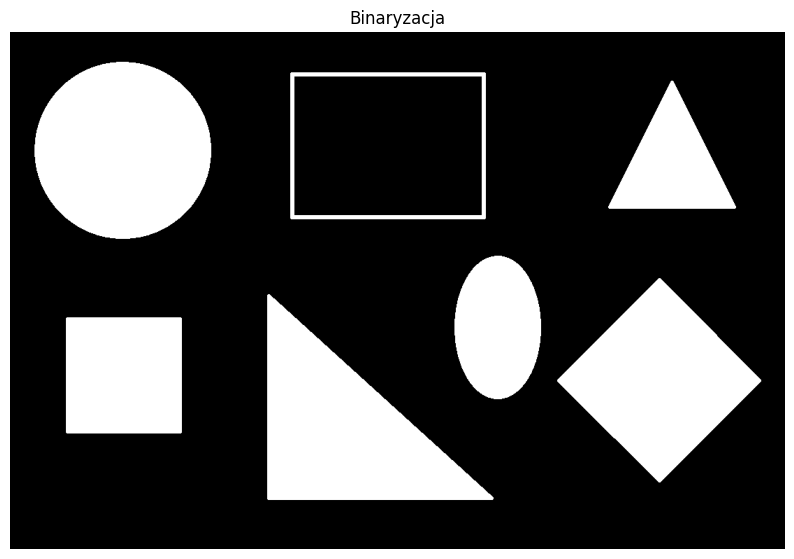

In [10]:

# 2.2 Binaryzacja
_, binary = cv2.threshold(filtered, 127, 255, cv2.THRESH_BINARY_INV)
plt.figure(figsize=(10, 10))
plt.title('Binaryzacja')
plt.imshow(binary, cmap='gray')
plt.axis('off')
plt.show()


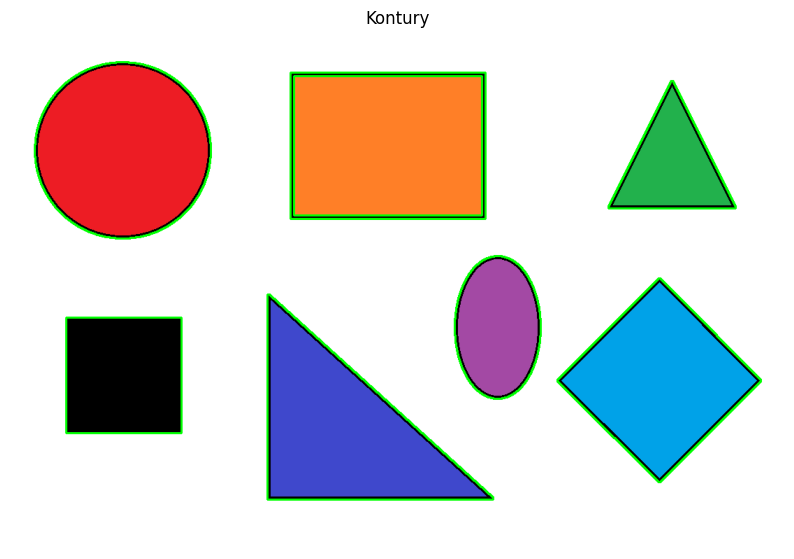

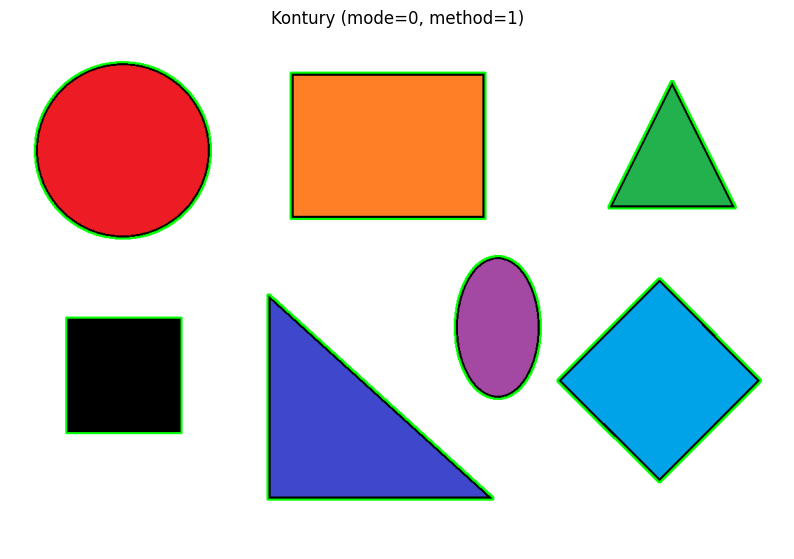

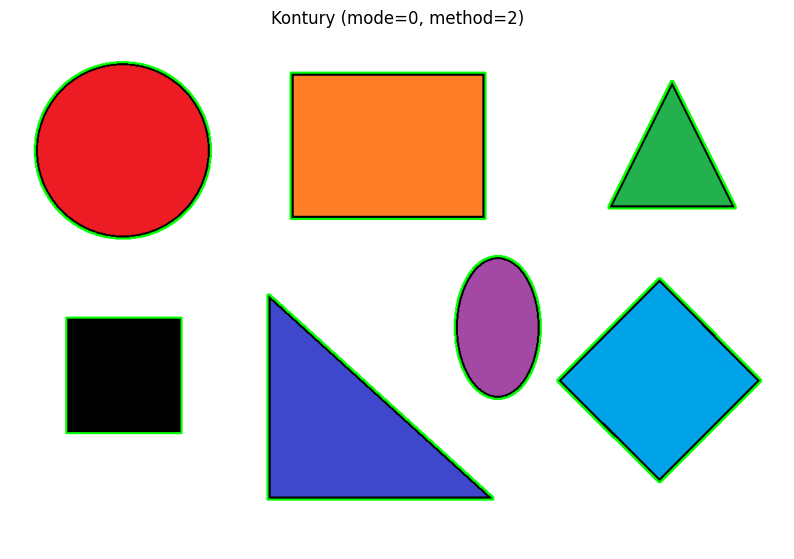

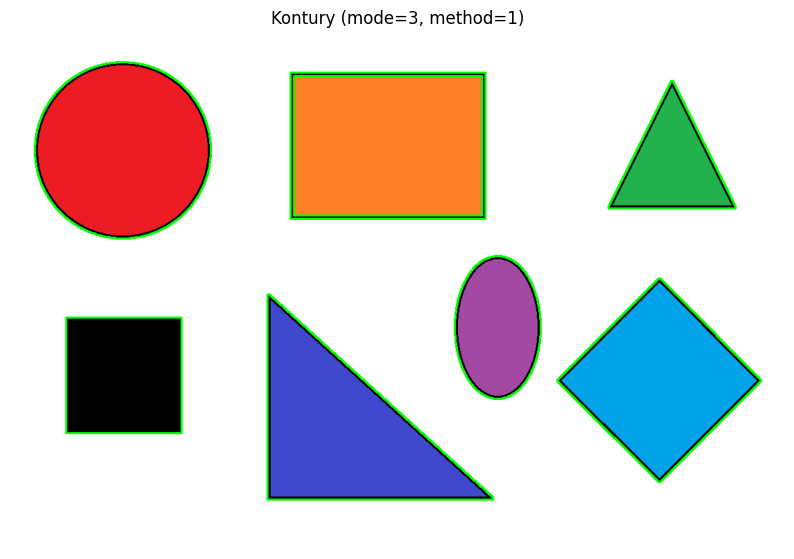

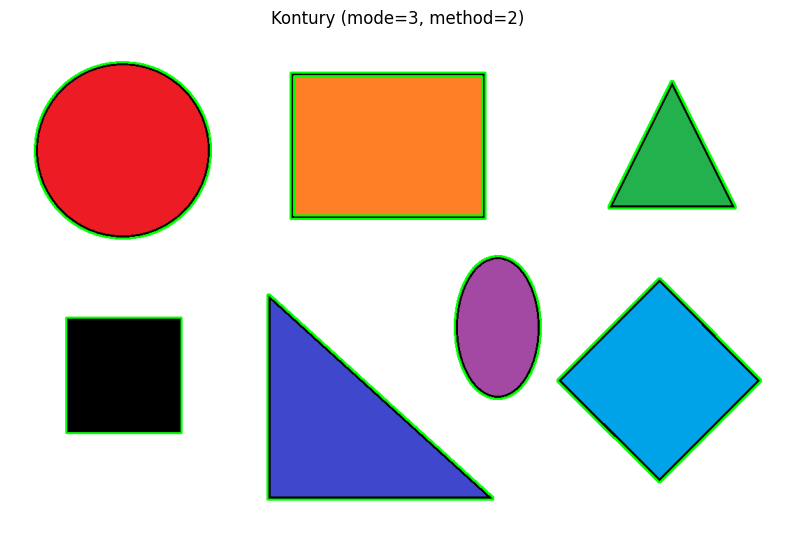

In [11]:

# 3. Wyszukanie konturów
contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour_image = np.copy(image)
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
plt.figure(figsize=(10, 10))
plt.title('Kontury')
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Testowanie różnych wartości mode i method dla findContours
contours_list = []
methods = [(cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE), (cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE),
           (cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE), (cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)]

for mode, method in methods:
    contours, _ = cv2.findContours(binary, mode, method)
    contour_image = np.copy(image)
    cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
    contours_list.append((mode, method, contour_image))

# Display contours with different methods
for i, (mode, method, contour_image) in enumerate(contours_list):
    plt.figure(figsize=(10, 10))
    plt.title(f'Kontury (mode={mode}, method={method})')
    plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


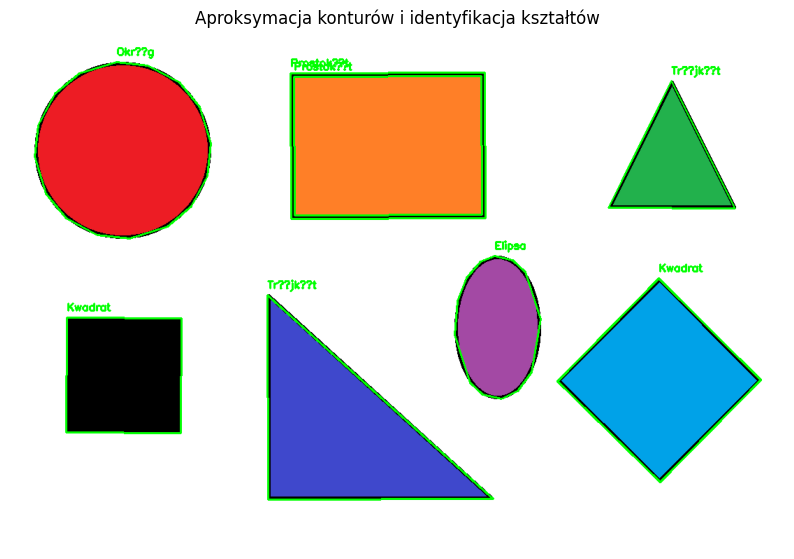

In [12]:

# 4. Aproksymacja konturów i identyfikacja kształtów
approx_image = np.copy(image)
for contour in contours:
    epsilon = 0.01 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    
    # Rozpoznawanie kształtów na podstawie liczby wierzchołków
    vertices = len(approx)
    shape = "Nieznany"
    if vertices == 3:
        shape = "Trójkąt"
    elif vertices == 4:
        x, y, w, h = cv2.boundingRect(approx)
        if abs(w - h) <= 3:
            shape = "Kwadrat"
        else:
            shape = "Prostokąt"
    elif vertices > 4:
        (x, y), (MA, ma), angle = cv2.fitEllipse(contour)
        aspect_ratio = MA / ma
        if abs(aspect_ratio - 1) < 0.1:
            shape = "Okrąg"
        else:
            shape = "Elipsa"
    
    # Rysowanie aproksymowanego konturu i nazwy kształtu
    cv2.drawContours(approx_image, [approx], -1, (0, 255, 0), 2)
    x, y = approx[0][0]
    cv2.putText(approx_image, shape, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.title('Aproksymacja konturów i identyfikacja kształtów')
plt.imshow(cv2.cvtColor(approx_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
